In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.DataFrame(pd.read_csv("./Family_Income_and_Expenditure.csv"))
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [69]:

# Xác định các biến thành phần độc lập và biến giải thích
compositional_cols = ['Total Food Expenditure', 'Medical Care Expenditure', 'Education Expenditure',
                      'Housing and water Expenditure', 'Communication Expenditure', 
                      'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 
                      'Clothing, Footwear and Other Wear Expenditure']

#data = 
var_target = df['Total Household Income']
#family = family[(family != 0).all(axis=1)]

# chuyển dữ liệu thành phần
compositional_data = df[compositional_cols]
compositional_data = compositional_data.div(compositional_data.sum(axis=1), axis=0)
compositional_data.head()

,Total Food Expenditure,Medical Care Expenditure,Education Expenditure,Housing and water Expenditure,Communication Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure"
0,0.515457,0.015121,0.158336,0.278339,0.012597,0.000000,0.000000,0.020151
1,0.426260,0.022141,0.184302,0.260225,0.035854,0.006039,0.013411,0.051768
2,0.730016,0.000829,0.005036,0.169917,0.004977,0.003199,0.053618,0.032408
3,0.800158,0.000614,0.003070,0.170267,0.006754,0.004912,0.000000,0.014225
4,0.708022,0.001048,0.000000,0.232867,0.015713,0.007782,0.000000,0.034569


In [70]:
# Thay thế các giá trị bằng 0 bằng một epsilon nhỏ
epsilon = 1e-9
compositional_data = compositional_data.replace(0, epsilon)

# Chuyển đổi dữ liệu thành phần bằng centered log-ratio (CLR)
clr_compositional_data = clr(compositional_data)

# Chuyển dữ liệu CLR về dạng DataFrame để tiện sử dụng
#clr_compositional_data = pd.DataFrame(clr_compositional_data, columns=compositional_cols)
clr_compositional_data = pd.DataFrame(clr_compositional_data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(compositional_data, var_target, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính với kiểm tra chéo
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')  # Sửa lỗi 'neg_mean_squared_error'

# Huấn luyện mô hình trên toàn bộ tập huấn luyện
model.fit(X_train, y_train)  # Bỏ bước huấn luyện riêng trên tập train

# In ra các tham số của mô hình
print("Độ chặn:", model.intercept_)
print("Hệ số hồi quy:", model.coef_)

Độ chặn: 29479708554376.78
Hệ số hồi quy: [-2.94797086e+13 -2.94797079e+13 -2.94797077e+13 -2.94797080e+13
 -2.94797043e+13 -2.94797087e+13 -2.94797088e+13 -2.94797071e+13]


In [71]:
# In mô hình ra console
print("CV RMSE scores:", np.sqrt(-cv_scores))
print("Mean CV RMSE:", np.sqrt(-cv_scores).mean())

CV RMSE scores: [251193.73569494 222698.26942543 209195.67619931 271343.86466915
 305228.5542115  210431.35818953 190463.395424   221685.96547158
 232458.52551806 310558.83643382]
Mean CV RMSE: 242525.81812373322


In [72]:
# Tính tầm quan trọng của các biến
importance = model.coef_
var_importance = pd.DataFrame({'Variables': compositional_cols, 'Importance': importance})
var_importance = var_importance.sort_values(by='Importance', ascending=False)

In [73]:
# Hàm để vẽ tầm quan trọng của các biến
def plot_importance(var_importance):
    var_importance['Rank'] = var_importance['Importance'].rank(ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')
    for index, row in var_importance.iterrows():
        plt.text(row['Importance'], index, f"#{int(row['Rank'])}", color='black', ha="left", va="center")
    plt.title('Relative Variable Importance')
    plt.show()

/tmp/ipykernel_27109/2445877765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')


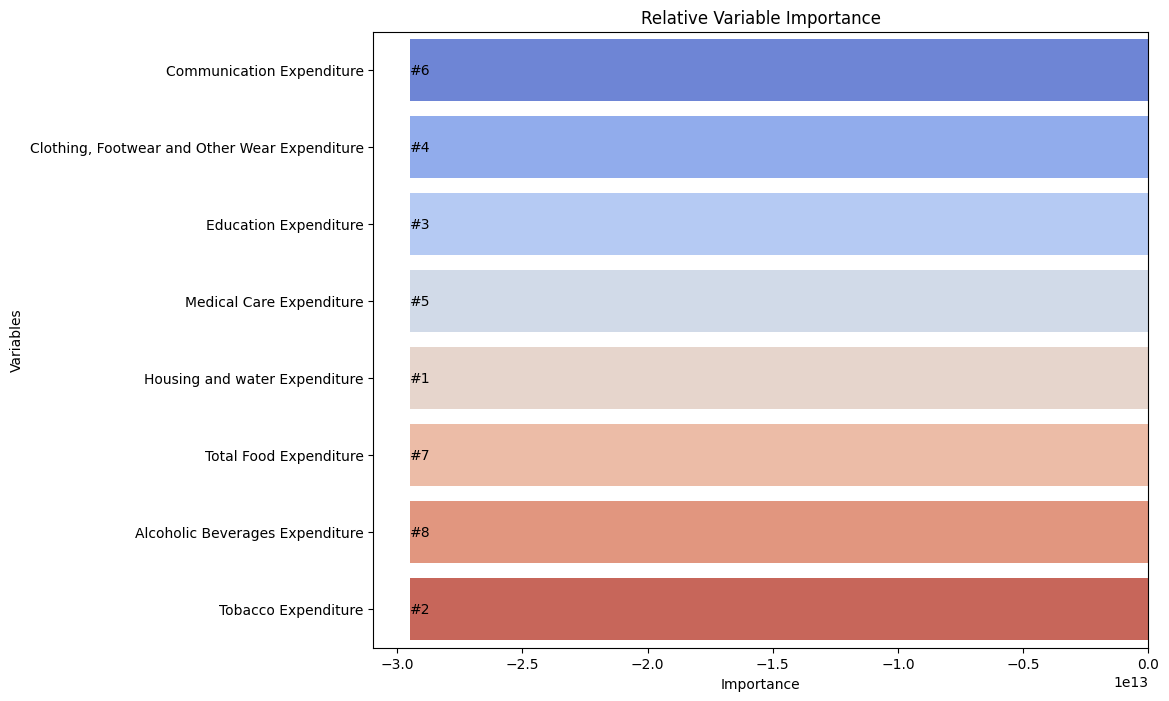

In [74]:
plot_importance(var_importance)

In [75]:
# Dự đoán cho tập kiểm tra
pred = model.predict(X_test)

# In ra console các giá trị dự đoán
print(pred)

[419920.078125  484950.9765625 332511.703125  ...  25012.3515625
 145970.109375   65819.90625  ]


In [76]:
# Tính toán lỗi
error = pred - y_test

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)

RMSE: 223058.4810684052


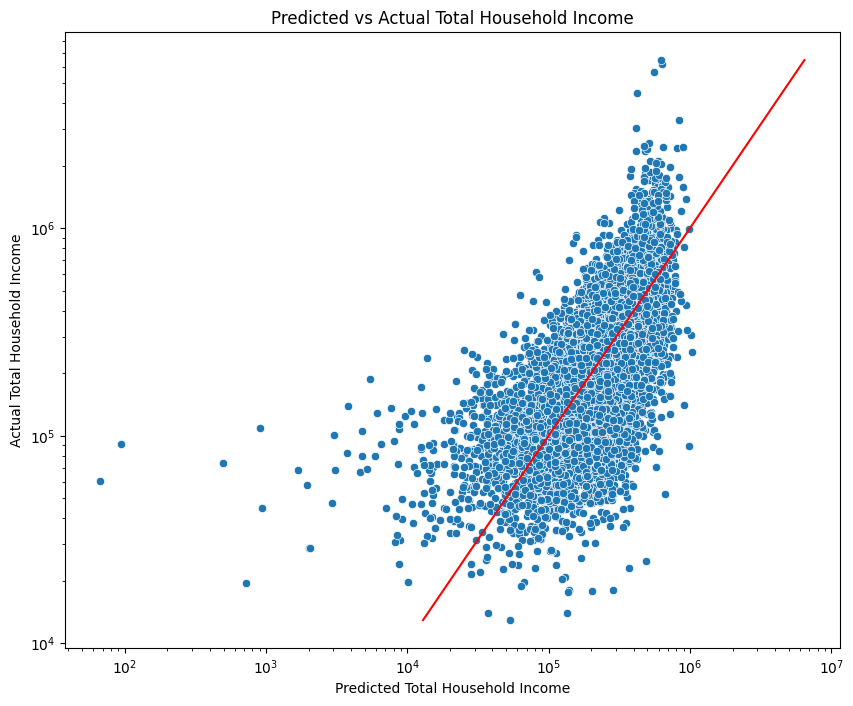

In [77]:
# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Predicted Total Household Income')
plt.ylabel('Actual Total Household Income')
plt.title('Predicted vs Actual Total Household Income')
plt.show()

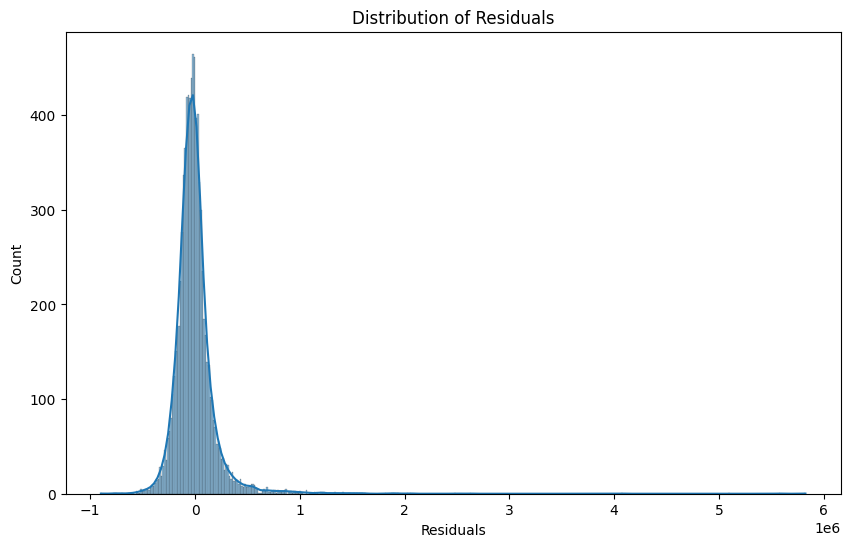

In [78]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()